In [38]:
#Importing the libraries
import numpy as np
import keras
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import  ImageDataGenerator as Imgen
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation,AveragePooling2D
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 rotation_range= 10,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",
                 validation_split=0.10)
#Augmenting the testing dataset
testgen = Imgen(
                rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 rotation_range= 15,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest"
                )

In [29]:
trainds = traingen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Training",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 32,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 32,
                                     subset="validation"
                                      )
testds = traingen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 32,
                                     shuffle=False
                                      )
c = trainds.class_indices
classes = list(c.keys())
classes

Found 5750 images belonging to 4 classes.
Found 636 images belonging to 4 classes.
Found 637 images belonging to 4 classes.


['glioma', 'meningioma', 'notumor', 'pituitary']

In [30]:
#Building the Deep Learning model
model = Sequential([
    # first Layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    AveragePooling2D((2, 2)),
        # first Layer
    Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    AveragePooling2D((2, 2)),
    # second layer
    Conv2D(filters=128, kernel_size=(3, 3), padding = 'same', activation='relu'),
    AveragePooling2D((2, 2)),
        Conv2D(filters=256, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    AveragePooling2D((2, 2)),
    # second layer
    Conv2D(filters=512, kernel_size=(3, 3), padding = 'same', activation='relu'),
    AveragePooling2D((2, 2)),
    Dropout(0.01),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 130, 130, 32)      896       
                                                                 
 average_pooling2d_10 (Aver  (None, 65, 65, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 65, 65, 64)        18496     
                                                                 
 average_pooling2d_11 (Aver  (None, 32, 32, 64)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 average_pooling2d_12 (Aver  (None, 16, 16, 128)      

In [32]:
model.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [33]:
history = model.fit(trainds,validation_data=valds,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
180/180 [==============================] - 1701s 9s/step - loss: 1.1372 - accuracy: 0.4910 - val_loss: 1.1307 - val_accuracy: 0.6006
Epoch 2/10
180/180 [==============================] - 48s 265ms/step - loss: 0.8524 - accuracy: 0.6558 - val_loss: 1.0109 - val_accuracy: 0.5928
Epoch 3/10
180/180 [==============================] - 47s 264ms/step - loss: 0.7305 - accuracy: 0.7075 - val_loss: 0.9577 - val_accuracy: 0.5865
Epoch 4/10
180/180 [==============================] - 46s 256ms/step - loss: 0.6483 - accuracy: 0.7383 - val_loss: 0.6899 - val_accuracy: 0.7217
Epoch 5/10
180/180 [==============================] - 46s 256ms/step - loss: 0.5797 - accuracy: 0.7708 - val_loss: 0.6619 - val_accuracy: 0.7343
Epoch 6/10
180/180 [==============================] - 47s 262ms/step - loss: 0.5365 - accuracy: 0.7877 - val_loss: 0.6275 - val_accuracy: 0.7406
Epoch 7/10
180/180 [==============================] - 47s 260ms/step - loss: 0.5048 - accuracy: 0.8038 - val_loss: 0.6509 - val_acc

In [34]:
model.evaluate(testds)

20/20 [==============================] - 241s 13s/step - loss: 0.5328 - accuracy: 0.7881


[0.5327796339988708, 0.7880690693855286]

<Figure size 640x480 with 0 Axes>

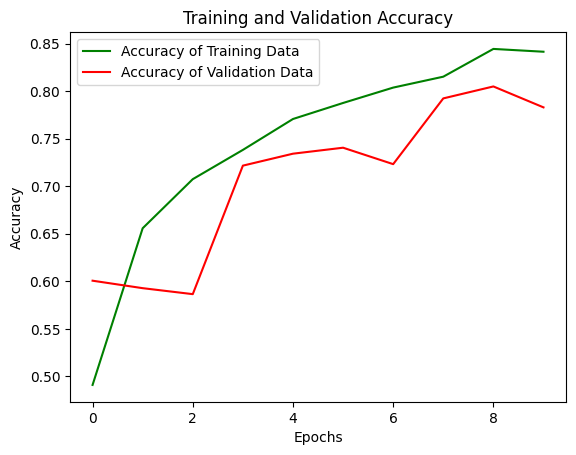

<Figure size 640x480 with 0 Axes>

In [35]:
#Data Visualization for the model
#Training and Validation Accuracy
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


<Figure size 640x480 with 0 Axes>

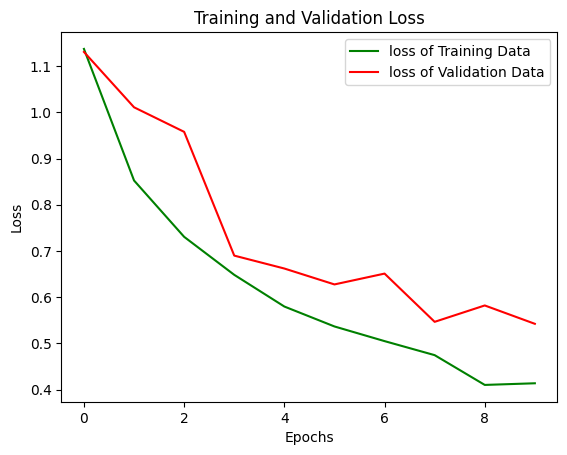

<Figure size 640x480 with 0 Axes>

In [36]:
#Data Visualization for the model
#Training and Validation Loss
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['loss'], 'green', label='loss of Training Data')
plt.plot(epochs, history.history['val_loss'], 'red', label='loss of Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

20/20 [==============================] - 5s 234ms/step
Confusion Matrix
[[ 98  29   0  25]
 [ 25 111   5  19]
 [  2   4 152   7]
 [  3   6   1 150]]
Classification Report
              precision    recall  f1-score   support

      glioma       0.77      0.64      0.70       152
  meningioma       0.74      0.69      0.72       160
     notumor       0.96      0.92      0.94       165
   pituitary       0.75      0.94      0.83       160

    accuracy                           0.80       637
   macro avg       0.80      0.80      0.80       637
weighted avg       0.81      0.80      0.80       637



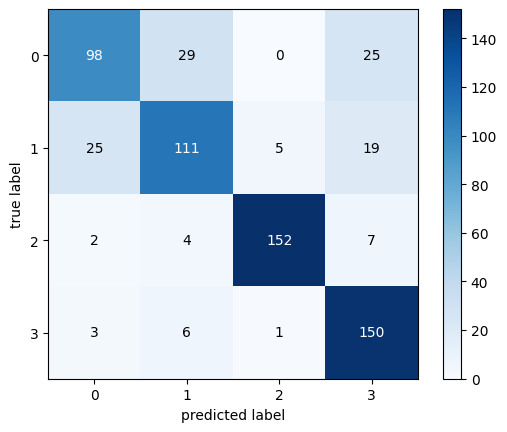

In [39]:
batch_size=32
batchY = testds.classes
num_of_test_samples = 637
target_names = testds.class_indices
#Confution Matrix and Classification Report
Y_pred = model.predict(testds, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testds.classes, y_pred)
print(cm)
print('Classification Report')
print(classification_report(testds.classes, y_pred, target_names=target_names))
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False
                                 )
plt.savefig("Confusion Matrix")
plt.show()